In [138]:
import os
import os.path
from os import path
import shutil
from tqdm import tqdm
import pandas as pd
import sys
import time
import logging
import numpy as np
import matplotlib.pyplot as plt
import cv2
import re
from pathlib import Path
from unidip import UniDip
import unidip.dip as dip
from sklearn.mixture import GaussianMixture
from frame_count import frame_count

In [3]:
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [4]:
def find_min_round(array):
    array = np.array(array.loc[[0,1,2,5,8,11,15,16,17]])#remove the arms from the equation cause the bounding boxes are too large 
    x = round(np.min(array[np.nonzero(array)]))
    return(x)

def find_max_round(array):
    array = np.array(array.loc[[0,1,2,5,8,11,15,16,17]])
    x = round(np.max(array))
    return(x)

In [4]:
def bounding_box(frame,coords):
    bbox = frame[find_min_round(coords['y']):find_max_round(coords['y']),
           find_min_round(coords['x']):find_max_round(coords['x'])]
    return(bbox)

## iterate thru all of skeleton 1 (tracked) in all the videos


In [142]:
path_skeletons = Path('/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/')
folders = [x for x in sorted_alphanumeric(os.listdir(path_skeletons)) if x[0]!="."]
path_videos = Path('/Users/andreibirladeanu/Documents/Data/meal_videos/')

In [145]:
### if one of the 3 skeleton folders is less than 10% of the whole data then discard

    
for folder in folders:
    sample_size = 0
    if folder[0] == ".":
        continue
    for skeleton in os.listdir(os.path.join(path_skeletons, folder)):
        if skeleton[0] ==".":
            continue
        sample_size += len(os.listdir(os.path.join(path_skeletons, folder, skeleton)))
    for skeleton in os.listdir(os.path.join(path_skeletons, folder)):
        if skeleton[0] ==".":
            continue
        if len(os.listdir(os.path.join(path_skeletons, folder, skeleton))) < (5/100*sample_size):
            shutil.rmtree(os.path.join(path_skeletons, folder, skeleton))
        

In [143]:
sk = 'skel1'
skeleton_folders = [os.path.join(path_skeletons, folder, sk) for folder in folders if folder[0]!="."]

In [126]:
folders

['1043_meal',
 '1047_meal',
 '1049_meal',
 '1049_meal_1',
 '1053_meal',
 '1059_meal',
 '1059_meal_1',
 '1062_meal',
 '1069_meal',
 '1073_meal',
 '1073_meal_1',
 '1079_meal',
 '1079_meal_1',
 '1080_meal',
 '1082_meal',
 '1082_meal_1',
 '1089_meal',
 '1089_meal_1',
 '1089_meal_2',
 '1091_meal',
 '1092_meal',
 '1093_meal',
 '1096_meal',
 '1096_meal_1',
 '1097_meal',
 '1098_meal',
 '1098_meal_1',
 '1099_meal',
 '1104_meal',
 '1104_meal_1',
 '1105_meal',
 '1107_meal',
 '1108_meal',
 '1108_meal_1',
 '1108_meal_2',
 '1112_meal',
 '1112_meal_1',
 '1112_meal_2',
 '1117_meal',
 '1118_meal',
 '1118_meal_1',
 '1122_meal',
 '1124_meal',
 '1125_meal',
 '1129_meal',
 '1130_meal',
 '1131_meal',
 '1132_meal',
 '1148_meal',
 '1161_meal',
 '1161_meal_1',
 '1170_meal',
 '1180_meal',
 '1181_meal',
 '1184_meal',
 '1186_meal',
 '1190_meal',
 '1190_meal_1',
 '1195_meal',
 '1195_meal_1',
 '1206_meal',
 '1206_meal_1',
 '1210_meal',
 '1217_meal',
 '1217_meal_1',
 '1230_meal',
 '1234_meal',
 '1241_meal',
 '1245_m

In [144]:
skeleton_folders, folders

(['/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1043_meal/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1047_meal/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1049_meal/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1049_meal_1/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1053_meal/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1059_meal/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1059_meal_1/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1062_meal/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1069_meal/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1073_meal/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1073_meal_1/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1079_meal/skel3',
  '/Users/andreibirladeanu/Documents/Data/meal_tracked_exp/1079_meal_1

In [137]:
for x in skeleton_folders:
    print(x)

/Users/andreibirladeanu/Documents/Data/meal_tracked/1043_meal/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1047_meal/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1049_meal/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1049_meal_1/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1053_meal/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1059_meal/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1059_meal_1/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1062_meal/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1069_meal/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1073_meal/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1073_meal_1/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1079_meal/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1079_meal_1/skel3
/Users/andreibirladeanu/Documents/Data/meal_tracked/1080_meal/skel3
/Users/andreibirladeanu/Documents/Data/m

## 2. for each folder get bounding boxes by using the skeleton and save them inside a numpy array

In [ ]:

for skeleton, folder in tqdm(zip(skeleton_folders, folders)): ## outermost loop - iterate thru the video openpose folders
    if path.exists(skeleton) == False:
        continue
    cap = cv2.VideoCapture(os.path.join(path_videos, folder+'.mp4')) ## get video capture for the video
    skel = sorted_alphanumeric(os.listdir(skeleton)) ### get a list of skeleton files inside the folder
    if len(skel) < 10000: ## lower p value if the sample size is very high to avoid false positives
        p = 0.05
    else:
        p = 0.01
    if '.DS_Store' in skel:
        skel.remove('.DS_Store')
    bboxes = []
    print(folder)
    for file in skel: ### iterate thru the skeleton - innermost loop
        cap.set(1,int(file.split('.')[0])-1)
        ret, image = cap.read()
        coords = pd.read_csv(os.path.join(path_skeletons, skeleton, file))

        bbox = image[find_min_round(coords['y']):find_max_round(coords['y']),
           find_min_round(coords['x']):find_max_round(coords['x'])]
        if bbox.shape[0]==0 or bbox.shape[1] ==0:
            continue
        bboxes.append(image[find_min_round(coords['y']):find_max_round(coords['y']),
           find_min_round(coords['x']):find_max_round(coords['x'])])

    bboxes = np.array(bboxes)
    for_hist = np.array([[np.mean(np.mean(x, axis=1))] for x in bboxes])
    for_test = np.array([np.mean(np.mean(x, axis=1)) for x in bboxes])
    for_test= np.msort(for_test)
    #plt.hist(for_hist)
    unimodal = dip.diptst(for_test)[1]
    if unimodal < p:
        gm = GaussianMixture(n_components=2, random_state=0).fit(for_hist)
        labels = gm.predict(for_hist) #### 
        ## make 2 new folders 
        
        path_1 = os.path.join(path_skeletons, folder, sk +'_tr1')
        path_2 = os.path.join(path_skeletons, folder, sk +'_tr2')
        os.mkdir(path_1);os.mkdir(path_2)
        for label, coords in zip(range(len(labels)),range(len(skel))):
            if labels[label] == 0:
                Path(os.path.join(skeleton, skel[coords])).rename(os.path.join(path_1, skel[coords]))
            elif labels[label] == 1:
                Path(os.path.join(skeleton, skel[coords])).rename(os.path.join(path_2, skel[coords]))
        shutil.rmtree(skeleton) # delete the original folder after the files have been split
    
        
        
print('success')
    
    
    
        


0it [00:00, ?it/s]

1049_meal


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
3it [01:09, 23.08s/it]

1049_meal_1


4it [01:33, 23.47s/it]

1053_meal


5it [04:19, 68.46s/it]

1059_meal_1
0.002997002997002997


7it [04:49, 43.09s/it]

1069_meal


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.002997002997002997


9it [06:18, 43.75s/it]

1073_meal


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
10it [06:36, 37.80s/it]

0.04795204795204795
1079_meal


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
12it [07:23, 32.24s/it]

1080_meal
0.000999000999000999


14it [08:58, 37.77s/it]

1089_meal_2


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
19it [09:43, 21.57s/it]

1096_meal


23it [10:50, 19.76s/it]

1096_meal_1


24it [11:02, 18.82s/it]

1097_meal


25it [12:05, 25.35s/it]

1108_meal
0.000999000999000999


33it [13:01, 13.82s/it]

1108_meal_2


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
35it [13:14, 12.45s/it]

1112_meal_1


37it [13:52, 13.75s/it]

1117_meal
0.001998001998001998


39it [15:04, 18.88s/it]

1122_meal


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
42it [15:42, 16.83s/it]

1124_meal
0.000999000999000999


43it [16:20, 19.74s/it]

1125_meal


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.000999000999000999


44it [24:46, 98.53s/it]

1148_meal


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
49it [25:13, 48.57s/it]

1170_meal


52it [25:33, 35.33s/it]

0.000999000999000999
1184_meal


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
55it [29:22, 48.05s/it]

1217_meal
0.000999000999000999


64it [30:07, 23.51s/it]

1217_meal_1


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
65it [30:26, 23.17s/it]

1241_meal


68it [30:57, 19.78s/it]

1245_meal
0.000999000999000999


69it [38:56, 70.81s/it]

1263_meal


/Users/andreibirladeanu/opt/anaconda3/envs/openpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
72it [39:29, 51.48s/it]

1264_meal


In [1]:
print('a')

a


### Evaluation

In [209]:
evaluation_path = Path('/Users/andreibirladeanu/Documents/Data/experimenting/tracked/1053_meal/skel1_tr1')
files = [x for x in sorted_alphanumeric(os.listdir(evaluation_path)) if x[0]!="."]
cap = cv2.VideoCapture(os.path.join(path_videos,'1053_meal.mp4'))
new_viz_path =  Path('/Users/andreibirladeanu/Documents/Data/experimenting/visualize/1053_meal/skel1_tr1')
os.mkdir(new_viz_path)
histogram = []

for file in files:
    cap.set(1,int(file.split('.')[0])-1)
    ret, image = cap.read()
    coords = pd.read_csv(os.path.join(evaluation_path, file))
    cv2.imwrite(os.path.join(new_viz_path, file.split('.')[0]+'.png'), image[find_min_round(coords['y']):find_max_round(coords['y']),
           find_min_round(coords['x']):find_max_round(coords['x'])])
   # histogram.append(image[find_min_round(coords['y']):find_max_round(coords['y']),
    #       find_min_round(coords['x']):find_max_round(coords['x'])])
    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/andreibirladeanu/Documents/Data/experimenting/tracked/1250_meal/skel2_tr1'

In [201]:
for_hist =  np.array([[np.mean(np.mean(x, axis=2))] for x in histogram])
for_dip =  np.array([np.mean(np.mean(x, axis=2)) for x in histogram])

(array([ 10.,  48.,  36.,  68.,  74., 130., 139.,  95.,  86.,  31.]),
 array([ 73.44623656,  79.63830995,  85.83038334,  92.02245673,
         98.21453012, 104.40660352, 110.59867691, 116.7907503 ,
        122.98282369, 129.17489708, 135.36697047]),
 <BarContainer object of 10 artists>)

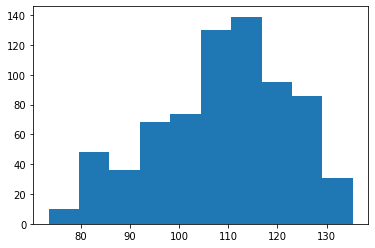

In [202]:
plt.hist(for_hist)


In [101]:
evaluation_path = Path('/Users/andreibirladeanu/Documents/Data/experimenting/tracked/1117_meal/skel3_tr1')
files = [x for x in sorted_alphanumeric(os.listdir(evaluation_path)) if x[0]!="."]
cap = cv2.VideoCapture(os.path.join(path_videos,'1117_meal.mp4'))
new_viz_path =  Path('/Users/andreibirladeanu/Documents/Data/experimenting/visualize/1117_meal/skel3_tr1')
new_viz_path.mkdir(parents=True, exist_ok=True)
histogram = []

for file in files:
    cap.set(1,int(file.split('.')[0])-1)
    ret, image = cap.read()
    coords = pd.read_csv(os.path.join(evaluation_path, file))
    bbox = image[find_min_round(coords['y']):find_max_round(coords['y']),
           find_min_round(coords['x']):find_max_round(coords['x'])]
    if bbox.shape[0]==0 or bbox.shape[1] ==0:
            continue
    cv2.imwrite(os.path.join(new_viz_path, file.split('.')[0]+'.png'), image[find_min_round(coords['y']):find_max_round(coords['y']),
           find_min_round(coords['x']):find_max_round(coords['x'])])

KeyboardInterrupt: 

In [30]:
histogram[-1]

array([], shape=(92, 0, 3), dtype=uint8)

In [31]:
filename = Path('/Users/andreibirladeanu/Documents/Data/experimenting/tracked/1122_meal/skel2/1206.csv')
data = pd.read_csv(filename)

In [32]:
find_min_round(data['y']), find_max_round(data['y'])

(173, 265)

In [33]:
find_min_round(data['x']), find_max_round(data['x'])

(230, 230)

In [131]:
frame_count(os.path.join(path_videos,'1097_meal.mp4'), manual=True)

21353

In [149]:
cap.set(1,21350)
ret,image= cap.read()

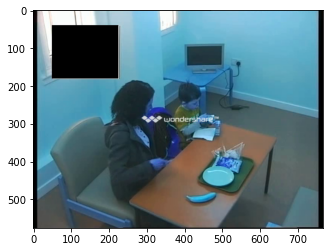

In [150]:
plt.imshow(image)

## let's converge: cluster the folders into 2 

In [139]:
path_to_tracked = Path('/Users/andreibirladeanu/Documents/Data/experimenting/tracked/1117_meal')
skeletons = [x for x in sorted_alphanumeric(os.listdir(path_to_tracked)) if x[0]!="."]

6

In [ ]:
all_torsos = []
for skeleton in skeletons:
    torso_sizes = []
    for coords in skeleton:
        data = pd.read_csv(os.path.join(path_to_tracked, skeleton, coords))
        torso = torso_size(data)
        if torso != 0:
            torso_sizes.append(torso)
    all_torsos.append(np.mean(torso_sizes))
    

In [ ]:
neigh = NearestNeighbors(n_neighbors=1, algorithm = 'brute', metric='euclidean')

neigh.fit([[new_skeleton1[-1][0][1],  new_skeleton1[-1][1][1]]])
dist, nn = neigh.kneighbors([[skeletons[i]['skeleton1'][0][1],  skeletons[i]['skeleton1'][1][1]]], 
                                    return_distance = True)